Derek Wang [DH 140]

# List of Elementary School Districts recorded by the U.S. Census in California

In this assignment, we explore the following dataset, which consists of all elementary school districts in California. The data was found under "Elementary School Districts (2012)" from http://boundaries.latimes.com/sets/. This dataset contains 21 columns and 543 rows. With this data, I was able to remove null values, subset specific values, and create a bar plot of the highest grades covered by the elementary school district in California. 

## Here, we import the geopanda module and read in the data using gpd.read_file(). 

By using type() we see that it is a geo dataframe.

In [1]:
import geopandas as gpd

In [2]:
district= gpd.read_file('data/district/elementary school district (2012).shp')

In [3]:
type(district)

geopandas.geodataframe.GeoDataFrame

## Here, we use .shape to find out the dimensions of the dataset.

The dataset has 21 columns and 543 rows. The columns are the features of the 543 elementary school districts in California. 

In [4]:
district.shape

(543, 21)

## Here, we use .info() to understand the data types of each feature. Additionally, it tells us if any values are missing. 

20 the features are "objects", which are assigned when the column contains mixed types like strings and numbers, while the last feature (geometry) is a "geometry" data type, which serves as the spatial component. We see that feature "NAME_1" is empty, so we will subset that out.

In [5]:
district.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   slug        543 non-null    object  
 1   set         543 non-null    object  
 2   kind        543 non-null    object  
 3   external_i  543 non-null    object  
 4   name        543 non-null    object  
 5   display_na  543 non-null    object  
 6   INTPTLAT    543 non-null    object  
 7   SDTYP       27 non-null     object  
 8   FUNCSTAT    543 non-null    object  
 9   INTPTLON    543 non-null    object  
 10  LSAD        543 non-null    object  
 11  HIGRADE     543 non-null    object  
 12  AWATER      543 non-null    object  
 13  LOGRADE     543 non-null    object  
 14  ELSDLEA     543 non-null    object  
 15  ALAND       543 non-null    object  
 16  MTFCC       543 non-null    object  
 17  GEOID       543 non-null    object  
 18  STATEFP     543 non-null    object  
 19  

In [6]:
#since NAME_1 contains empty values, NAME_1 is removed from "district"
del district['NAME_1']

## Here, we use .head() to get a general sense of what the data is like. 

.head() provides us with the first 5 rows of data. 

In [7]:
district.head()

,slug,set,kind,external_i,name,display_na,INTPTLAT,SDTYP,FUNCSTAT,INTPTLON,LSAD,HIGRADE,AWATER,LOGRADE,ELSDLEA,ALAND,MTFCC,GEOID,STATEFP,geometry
0,ackerman-elementary-school-district-elementary...,Elementary School Districts (2012),Elementary School District (2012),0601680,Ackerman Elementary School District,Ackerman Elementary School District Elementary...,+38.9366319,None,E,-121.0507823,00,08,7628,KG,01680,11222770,G5400,0601680,06,"POLYGON ((-121.07021 38.92071, -121.07024 38.9..."
1,adelanto-elementary-school-district-elementary...,Elementary School Districts (2012),Elementary School District (2012),0601710,Adelanto Elementary School District,Adelanto Elementary School District Elementary...,+34.6306439,None,E,-117.5205833,00,06,832474,KG,01710,868468891,G5400,0601710,06,"POLYGON ((-117.66004 34.49897, -117.66034 34.5..."
2,alexander-valley-union-elementary-school-distr...,Elementary School Districts (2012),Elementary School District (2012),0601890,Alexander Valley Union Elementary School District,Alexander Valley Union Elementary School Distr...,+38.6860805,None,E,-122.7921333,00,12,174852,KG,01890,171684210,G5400,0601890,06,"POLYGON ((-122.86574 38.68997, -122.86576 38.6..."
3,alisal-union-elementary-school-district-elemen...,Elementary School Districts (2012),Elementary School District (2012),0601950,Alisal Union Elementary School District,Alisal Union Elementary School District Elemen...,+36.6725661,None,E,-121.5195880,00,06,299711,KG,01950,168136717,G5400,0601950,06,"POLYGON ((-121.63022 36.67876, -121.62970 36.6..."
4,allensworth-elementary-school-district-element...,Elementary School Districts (2012),Elementary School District (2012),0601980,Allensworth Elementary School District,Allensworth Elementary School District Element...,+35.8303037,None,E,-119.3890390,00,08,0,KG,01980,52502492,G5400,0601980,06,"POLYGON ((-119.42782 35.79105, -119.42760 35.8..."


## Here, we use .plot() to create a bar plot of the highest grade covered by a district.

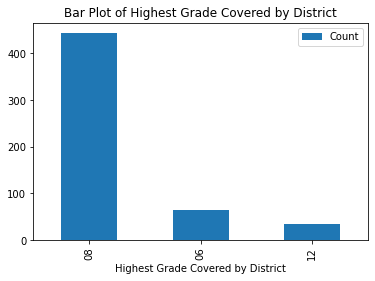

In [33]:
HIGRADE_COUNT = district["HIGRADE"].value_counts()
HIGRADE_COUNT = HIGRADE_COUNT.reset_index()
HIGRADE_COUNT.columns.to_list()
HIGRADE_COUNT.columns = ["Highest Grade Covered by District", "Count"]
HIGRADE_COUNT.plot.bar(x = "Highest Grade Covered by District", y = "Count", title = "Bar Plot of Highest Grade Covered by District")

## Here, we use .value_counts() on HIGRADE to see how many of each level there are. 

According to the output, 
- 444 of 543 elementary school districts in California cover education up to 8th grade. 
- 65 of 543 elementary school districts in California cover education up to 6th grade.
- 34 of 543 elementary school districts in California cover education up to 12th grade. 

In [30]:
district["HIGRADE"].value_counts()

08    444
06     65
12     34
Name: HIGRADE, dtype: int64

## We can also run a query on our data set to filter out specific information. 

The output gives us a subsetted version of the original dataset. It is subsetted to only contain elementary school districts in CA that have 6th grade as the highest grade they cover. 

In [32]:
district.query("HIGRADE == '06'")

,slug,set,kind,external_i,name,display_na,INTPTLAT,SDTYP,FUNCSTAT,INTPTLON,LSAD,HIGRADE,AWATER,LOGRADE,ELSDLEA,ALAND,MTFCC,GEOID,STATEFP,geometry
1,adelanto-elementary-school-district-elementary...,Elementary School Districts (2012),Elementary School District (2012),0601710,Adelanto Elementary School District,Adelanto Elementary School District Elementary...,+34.6306439,None,E,-117.5205833,00,06,832474,KG,01710,868468891,G5400,0601710,06,"POLYGON ((-117.66004 34.49897, -117.66034 34.5..."
3,alisal-union-elementary-school-district-elemen...,Elementary School Districts (2012),Elementary School District (2012),0601950,Alisal Union Elementary School District,Alisal Union Elementary School District Elemen...,+36.6725661,None,E,-121.5195880,00,06,299711,KG,01950,168136717,G5400,0601950,06,"POLYGON ((-121.63022 36.67876, -121.62970 36.6..."
12,anaheim-elementary-school-district-elementary-...,Elementary School Districts (2012),Elementary School District (2012),0602610,Anaheim Elementary School District,Anaheim Elementary School District Elementary ...,+33.8265579,None,E,-117.9167756,00,06,278075,KG,02610,54660214,G5400,0602610,06,"POLYGON ((-117.98057 33.85056, -117.98065 33.8..."
31,bellevue-union-elementary-school-district-elem...,Elementary School Districts (2012),Elementary School District (2012),0604380,Bellevue Union Elementary School District,Bellevue Union Elementary School District Elem...,+38.3933396,None,E,-122.7012564,00,06,26109,KG,04380,58447383,G5400,0604380,06,"POLYGON ((-122.76865 38.37212, -122.76882 38.3..."
35,bennett-valley-union-elementary-school-distric...,Elementary School Districts (2012),Elementary School District (2012),0604650,Bennett Valley Union Elementary School District,Bennett Valley Union Elementary School Distric...,+38.3874485,None,E,-122.6351844,00,06,44762,KG,04650,44080314,G5400,0604650,06,"POLYGON ((-122.67589 38.40134, -122.67601 38.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,victor-elementary-school-district-elementary-s...,Elementary School Districts (2012),Elementary School District (2012),0641040,Victor Elementary School District,Victor Elementary School District Elementary S...,+34.5161332,None,E,-117.3164248,00,06,2351811,KG,41040,100700881,G5400,0641040,06,"POLYGON ((-117.37313 34.47058, -117.37310 34.4..."
517,washington-union-elementary-school-district-el...,Elementary School Districts (2012),Elementary School District (2012),0641610,Washington Union Elementary School District,Washington Union Elementary School District El...,+36.5459453,None,E,-121.7007745,00,06,73428,KG,41610,106794456,G5400,0641610,06,"POLYGON ((-121.80829 36.57150, -121.80832 36.5..."
518,waugh-elementary-school-district-elementary-sc...,Elementary School Districts (2012),Elementary School District (2012),0641790,Waugh Elementary School District,Waugh Elementary School District Elementary Sc...,+38.2884936,None,E,-122.6365779,00,06,0,KG,41790,18766045,G5400,0641790,06,"POLYGON ((-122.66836 38.27513, -122.66535 38.2..."
533,wilmar-union-elementary-school-district-elemen...,Elementary School Districts (2012),Elementary School District (2012),0642750,Wilmar Union Elementary School District,Wilmar Union Elementary School District Elemen...,+38.2291087,None,E,-122.6904020,00,06,0,KG,42750,30832638,G5400,0642750,06,"POLYGON ((-122.71917 38.21357, -122.71875 38.2..."
